In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [2]:
import pandas as pd# Define the directory where your CSV files are located
csv_directory = 'D:/Education/Data Science/Good_reads/'


# List to store DataFrames
dataframes = []

# Loop through all CSV files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv'):
        csv_path = os.path.join(csv_directory, filename)
        I_df = pd.read_csv(csv_path)
        dataframes.append(I_df)

# Concatenate the DataFrames along rows (axis=0)
df = pd.concat(dataframes, axis=0, ignore_index=True)

# Print the concatenated DataFrame
df.head()


,Review_date,Title,Series,Author,Overall_Rating,Genre,Price,Reviewer,Individual_Rating,Review_Date,Review,Pages_published,Description
0,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"['Romance', 'Contemporary', 'Fiction', 'Time T...",Kindle $10.99,jessica,Rating 4 out of 5,"May 12, 2023",this book only solidifies my previous statemen...,"352 pages, Paperback ...","Sometimes, the worst day of your life happens,..."
1,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"['Romance', 'Contemporary', 'Fiction', 'Time T...",Kindle $10.99,Jayme,Rating 4 out of 5,"June 27, 2023","“If you don’t fit in, fool everyone until you ...","352 pages, Paperback ...","Sometimes, the worst day of your life happens,..."
2,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"['Romance', 'Contemporary', 'Fiction', 'Time T...",Kindle $10.99,Nilufer Ozmekik,Rating 5 out of 5,"June 28, 2023",Can you imagine falling for a man who lives se...,"352 pages, Paperback ...","Sometimes, the worst day of your life happens,..."
3,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"['Romance', 'Contemporary', 'Fiction', 'Time T...",Kindle $10.99,Terrie Robinson,Rating 4 out of 5,"June 27, 2023",HAPPY PUBLICATION DAY 6/27/23!!! ...,"352 pages, Paperback ...","Sometimes, the worst day of your life happens,..."
4,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"['Romance', 'Contemporary', 'Fiction', 'Time T...",Kindle $10.99,Hannah B.,Rating 5 out of 5,"June 20, 2023",NO IT WAS EVEN BETTER IN AUDIO HIS SOUTHERN DR...,"352 pages, Paperback ...","Sometimes, the worst day of your life happens,..."


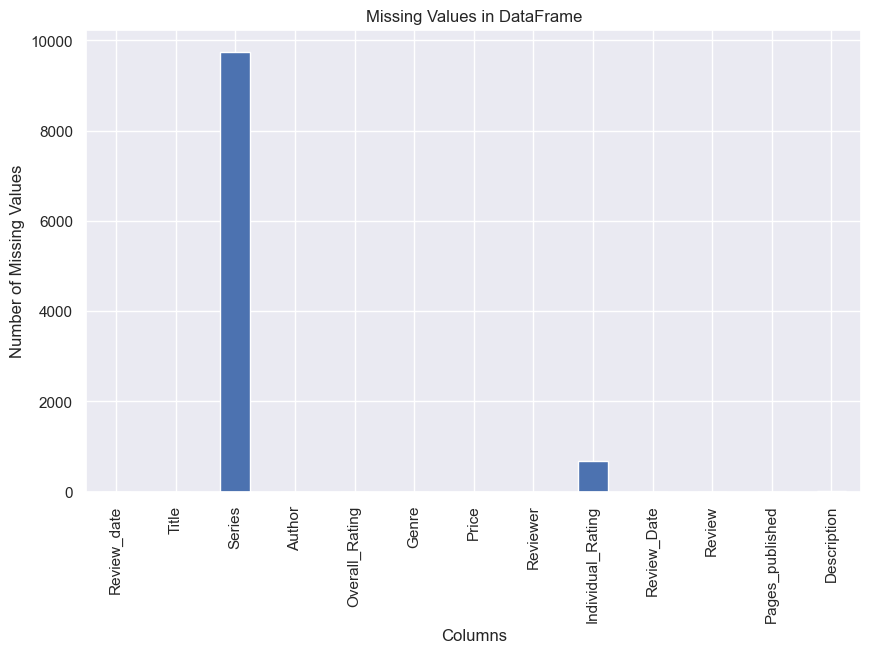

In [3]:
missing_values = df.isnull().sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [4]:
df['Individual_Rating'].isnull().sum()

688

In [5]:
df.describe()

,Overall_Rating
count,12794.000000
mean,4.047307
std,0.350609
min,2.300000
25%,3.820000
50%,4.060000
75%,4.290000
max,5.000000


In [6]:
df.shape

(12794, 13)

In [7]:
df.dtypes

Review_date           object
Title                 object
Series                object
Author                object
Overall_Rating       float64
Genre                 object
Price                 object
Reviewer              object
Individual_Rating     object
Review_Date           object
Review                object
Pages_published       object
Description           object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794 entries, 0 to 12793
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Review_date        12794 non-null  object 
 1   Title              12794 non-null  object 
 2   Series             3046 non-null   object 
 3   Author             12794 non-null  object 
 4   Overall_Rating     12794 non-null  float64
 5   Genre              12794 non-null  object 
 6   Price              12794 non-null  object 
 7   Reviewer           12794 non-null  object 
 8   Individual_Rating  12106 non-null  object 
 9   Review_Date        12794 non-null  object 
 10  Review             12794 non-null  object 
 11  Pages_published    12794 non-null  object 
 12  Description        12783 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.3+ MB


In [9]:
df['Pages_published'].describe()

count                                                 12794
unique                                                  292
top       304 pages, Hardcover                          ...
freq                                                    287
Name: Pages_published, dtype: object

In [10]:
df['Pages_published'].unique()

array(['352 pages, Paperback                             First published June 27, 2023',
       '352 pages, Hardcover                             First published June 13, 2023',
       '560 pages, Hardcover                             First published June 13, 2023',
       '448 pages, Hardcover                             First published June 27, 2023',
       '416 pages, Paperback                             First published June 6, 2023',
       '304 pages, Hardcover                             First published June 13, 2023',
       '496 pages, Hardcover                             First published June 27, 2023',
       '304 pages, Hardcover                             First published June 20, 2023',
       '432 pages, Hardcover                             First published June 27, 2023',
       '464 pages, Hardcover                             First published June 13, 2023',
       '528 pages, Paperback                             First published June 20, 2023',
       '352 pages, Har

In [11]:
df[['Page_Type','Published']] = df['Pages_published'].str.split('                          ', expand=True)

In [12]:
df['Page_Type'].unique()

array(['352 pages, Paperback', '352 pages, Hardcover',
       '560 pages, Hardcover', '448 pages, Hardcover',
       '416 pages, Paperback', '304 pages, Hardcover',
       '496 pages, Hardcover', '432 pages, Hardcover',
       '464 pages, Hardcover', '528 pages, Paperback',
       '288 pages, Hardcover', '416 pages, Hardcover',
       '384 pages, Hardcover', 'ebook', '240 pages, Kindle Edition',
       '272 pages, Hardcover', '368 pages, Hardcover',
       '640 pages, Paperback', '459 pages, Kindle Edition',
       '320 pages, Paperback', '208 pages, Hardcover',
       '256 pages, Paperback', 'Hardcover', '214 pages, Kindle Edition',
       '218 pages, Kindle Edition', '320 pages, Hardcover',
       '373 pages, Kindle Edition', '444 pages, Kindle Edition',
       '56 pages, Hardcover', 'First published June 26, 2023',
       '247 pages, Kindle Edition', '232 pages, Paperback',
       '885 pages, Kindle Edition', '352 pages, ebook',
       '413 pages, Kindle Edition', '344 pages, Kindle

In [13]:
df[['Page_number', 'Type']]=df['Page_Type'].str.split(',', expand=True)

In [14]:
df['Page_number'].unique()

array(['352 pages', '560 pages', '448 pages', '416 pages', '304 pages',
       '496 pages', '432 pages', '464 pages', '528 pages', '288 pages',
       '384 pages', 'ebook', '240 pages', '272 pages', '368 pages',
       '640 pages', '459 pages', '320 pages', '208 pages', '256 pages',
       'Hardcover', '214 pages', '218 pages', '373 pages', '444 pages',
       '56 pages', 'First published June 26', '247 pages', '232 pages',
       '885 pages', '413 pages', '344 pages', '375 pages', '160 pages',
       'First published June 29', 'First published June 21', '1763 pages',
       '415 pages', '480 pages', '592 pages', '287 pages', '260 pages',
       '336 pages', '360 pages', '400 pages', '395 pages', '402 pages',
       '322 pages', '281 pages', '478 pages', '200 pages', '390 pages',
       'Kindle Edition', '118 pages', '355 pages', '407 pages',
       '271 pages', '224 pages', '222 pages', '576 pages', '176 pages',
       '48 pages', '245 pages', '688 pages', '223 pages', '182 pages',
  

In [15]:
index_of_fp = df.index[df['Page_number'].str.contains("First published")]
for index5 in index_of_fp:
    df.at[index5, 'Published'] = df.at[index5, 'Page_number']
    df.at[index5, 'Page_number']=0
    
index_of_ebook = df.index[df['Page_number'] == 'ebook']
for index1 in index_of_ebook:
    df.at[index1, 'Type'] = df.at[index1, 'Page_number']
    df.at[index1, 'Page_number']=0
    
index_of_hc = df.index[df['Page_number'] == 'Hardcover']
for index2 in index_of_hc:
    df.at[index2, 'Type'] = df.at[index2, 'Page_number']
    df.at[index2, 'Page_number']=0
    
index_of_ke = df.index[df['Page_number'] == 'Kindle Edition']
for index3 in index_of_ke:
    df.at[index3, 'Type'] = df.at[index3, 'Page_number']
    df.at[index3, 'Page_number']=0
    
index_of_pb = df.index[df['Page_number'] == 'Perfectbound']
for index4 in index_of_pb:
    df.at[index4, 'Type'] = df.at[index4, 'Page_number']
    df.at[index4, 'Page_number']=0
    


In [16]:
df['Page_number']=df['Page_number'].str.replace('pages','')

In [17]:
df['Page_number']=df['Page_number'].str.strip()

In [18]:
df['Page_number']=df['Page_number'].astype(float)

In [19]:
df['Type'].unique()

array([' Paperback', ' Hardcover', 'ebook', ' Kindle Edition',
       'Hardcover', ' 2023', ' ebook', 'Kindle Edition', None,
       ' Perfect Paperback', ' Mass Market Paperback', 'Perfectbound'],
      dtype=object)

In [20]:
index_of_23 = df.index[df['Type'] == ' 2023']
for index6 in index_of_23:
    df.at[index6,'Published']=df.at[index6,'Published']+','+df.at[index6,'Type']
    

In [21]:
df['Type']=df['Type'].str.replace(' 2023','')
    

In [22]:
df['Type']=df['Type'].str.strip()

In [23]:
df['Published'].unique()

array(['   First published June 27, 2023',
       '   First published June 13, 2023',
       '   First published June 6, 2023',
       '   First published June 20, 2023',
       '   First published June 1, 2023',
       '   First published June 9, 2023',
       '   First published June 8, 2023',
       '   First published June 14, 2023',
       '   First published June 30, 2023',
       'First published June 26, 2023', '   First published June 7, 2023',
       'First published June 29, 2023', 'First published June 21, 2023',
       '   First published May 2, 2023',
       '   First published May 30, 2023',
       '   First published May 25, 2023',
       '   First published June 22, 2023',
       '   First published June 21, 2023',
       '   First published May 11, 2023',
       '   First published May 16, 2023',
       '   First published May 9, 2023',
       '   First published June 4, 2023',
       '   First published May 23, 2023',
       '   First published May 18, 2023',
       

In [24]:
df['Published'] = df['Published'].str.replace('First published', '')

In [25]:
df['Published']=df['Published'].str.strip()

In [26]:
df['Published']=pd.to_datetime(df['Published'])
df.dtypes

Review_date                  object
Title                        object
Series                       object
Author                       object
Overall_Rating              float64
Genre                        object
Price                        object
Reviewer                     object
Individual_Rating            object
Review_Date                  object
Review                       object
Pages_published              object
Description                  object
Page_Type                    object
Published            datetime64[ns]
Page_number                 float64
Type                         object
dtype: object

In [27]:
df['Price']=df['Price'].str.replace('Kindle','',regex=True)

In [28]:
df['Price']=df['Price'].str.replace('$','',regex=True)
df['Price']=df['Price'].str.replace('Buy on Amazon','0',regex=True)
df['Price']=df['Price'].str.replace('Unlimited 0.00','0',regex=True)
df['Price'].unique()

array([' 10.99', ' 13.99', ' 8.57', ' 14.99', ' 12.99', ' 8.53', ' 11.99',
       '0', ' 5.99', ' 9.99', ' 0', ' 3.99', ' 4.99', ' 7.99', ' 9.13',
       ' 8.54', ' 7.39', ' 9.49', ' 19.99', ' 8.99', ' 17.99', ' 18.99',
       ' 0.99', ' 8.49', ' 15.99', ' 16.99', ' 9.14', ' 9.66', ' 9.95',
       ' 20.85', ' 9.57', ' 9.24', ' 6.99', ' 1.99', ' 11.38', ' 6.49',
       ' 7.49', ' 9.52', ' 11.49', ' 13.77'], dtype=object)

In [29]:
df['Price']=df['Price'].astype(float)

In [30]:
df['Individual_Rating'].describe()

count                 12106
unique                    5
top       Rating 5 out of 5
freq                   5004
Name: Individual_Rating, dtype: object

In [31]:
df['Individual_Rating'].unique()

array(['Rating 4 out of 5', 'Rating 5 out of 5', 'Rating 3 out of 5', nan,
       'Rating 1 out of 5', 'Rating 2 out of 5'], dtype=object)

In [32]:
df['Individual_Rating']=df['Individual_Rating'].str.replace('Rating', '',regex=True).replace('out of 5', '',regex=True)

In [33]:
df['Individual_Rating']=df['Individual_Rating'].astype(float)

In [34]:
df.rename(columns={'Review_date': 'Mining_date'}, inplace=True)

In [35]:
df['Mining_date']=pd.to_datetime(df['Mining_date'])

In [36]:
df['Review_Date']=pd.to_datetime(df['Review_Date'])

In [37]:
df['Genre'].unique()

array(["['Romance', 'Contemporary', 'Fiction', 'Time Travel', 'Magical Realism', 'Adult', 'Fantasy']",
       "['Science Fiction', 'Fiction', 'Fantasy', 'Adult', 'Contemporary', 'Humor', 'Science Fiction Fantasy']",
       "['Fantasy', 'Romance', 'Adult', 'Fantasy Romance', 'Young Adult', 'High Fantasy', 'Audiobook']",
       "['Horror', 'Mystery', 'Fiction', 'Mystery Thriller', 'Thriller', 'Adult', 'Halloween']",
       "['Romance', 'Fantasy', 'Historical Fiction', 'LGBT', 'Historical', 'Lesbian', 'Queer']",
       "['Nonfiction', 'Humor', 'History', 'Travel', 'Mythology', 'Death', 'Adult']",
       "['Historical Fiction', 'Fiction', 'Historical', 'Gothic', 'Fantasy', 'LGBT', 'Queer']",
       "['Science Fiction', 'LGBT', 'Fantasy', 'Adult', 'Fiction', 'Queer', 'Science Fiction Fantasy']",
       "['Horror', 'Science Fiction', 'Thriller', 'Fantasy', 'Mystery', 'Fiction', 'Audiobook']",
       "['Fantasy', 'Young Adult', 'Romance', 'Young Adult Fantasy', 'Mythology', 'Mermaids', 'High 

In [38]:
df['Genre']=df['Genre'].str.replace('[','',regex=True).replace(']','',regex=True).replace("'",'',regex=True)
df['Genre']

0        Romance, Contemporary, Fiction, Time Travel, M...
1        Romance, Contemporary, Fiction, Time Travel, M...
2        Romance, Contemporary, Fiction, Time Travel, M...
3        Romance, Contemporary, Fiction, Time Travel, M...
4        Romance, Contemporary, Fiction, Time Travel, M...
5        Romance, Contemporary, Fiction, Time Travel, M...
6        Romance, Contemporary, Fiction, Time Travel, M...
7        Romance, Contemporary, Fiction, Time Travel, M...
8        Romance, Contemporary, Fiction, Time Travel, M...
9        Romance, Contemporary, Fiction, Time Travel, M...
10       Romance, Contemporary, Fiction, Time Travel, M...
11       Romance, Contemporary, Fiction, Time Travel, M...
12       Romance, Contemporary, Fiction, Time Travel, M...
13       Romance, Contemporary, Fiction, Time Travel, M...
14       Romance, Contemporary, Fiction, Time Travel, M...
15       Romance, Contemporary, Fiction, Time Travel, M...
16       Romance, Contemporary, Fiction, Time Travel, M.

In [39]:
df[['Genre1', 'Genre2','Genre3','Genre4','Genre5','Genre6','Genre7']]=df['Genre'].str.split(',', expand=True)


In [40]:
df=df.drop(columns=['Pages_published','Page_Type'])


In [41]:
df.head(50)

,Mining_date,Title,Series,Author,Overall_Rating,Genre,Price,Reviewer,Individual_Rating,Review_Date,Review,Description,Published,Page_number,Type,Genre1,Genre2,Genre3,Genre4,Genre5,Genre6,Genre7
0,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,jessica,4.0,2023-05-12,this book only solidifies my previous statemen...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
1,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Jayme,4.0,2023-06-27,"“If you don’t fit in, fool everyone until you ...","Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
2,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Nilufer Ozmekik,5.0,2023-06-28,Can you imagine falling for a man who lives se...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
3,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Terrie Robinson,4.0,2023-06-27,HAPPY PUBLICATION DAY 6/27/23!!! ...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
4,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Hannah B.,5.0,2023-06-20,NO IT WAS EVEN BETTER IN AUDIO HIS SOUTHERN DR...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
5,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,paige,5.0,2023-07-02,"""The love stays. The love always stays, and so...","Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
6,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,EmBibliophile,3.0,2023-06-28,3.5 stars ...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
7,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Maren’s Reads,5.0,2023-06-29,4.5⭐️ Clementine is determined to keep her hea...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
8,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,Christy,3.0,2023-05-03,3.5 stars ...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy
9,2023-07-03,The Seven Year Slip,NaN,Ashley Poston,4.49,"Romance, Contemporary, Fiction, Time Travel, M...",10.99,emilybookedup,5.0,2023-06-19,this was an absolute GEM of a book! truly enjo...,"Sometimes, the worst day of your life happens,...",2023-06-27,352.0,Paperback,Romance,Contemporary,Fiction,Time Travel,Magical Realism,Adult,Fantasy


In [42]:
fig = px.histogram(df, x="Individual_Rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Rating')
fig.savefig('Rating.png')

AttributeError: 'Figure' object has no attribute 'savefig'

In [ ]:
plt.scatter( df['Individual_Rating'],df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating vs Price')
plt.grid(True)
plt.savefig("price.png")

In [ ]:
plt.scatter( df['Individual_Rating'],df['Page_number'])
plt.xlabel('Rating')
plt.ylabel('Page_number')
plt.title('Rating vs Pages')
plt.grid(True)
plt.savefig("rating Vs pages.png")

In [ ]:
grouped_df = df.groupby(['Genre1', 'Individual_Rating']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 30))

width = 0.15
x = range(len(grouped_df))

for i, rating in enumerate(range(1, 6)):
    ax.barh([pos + width * i for pos in x], grouped_df[rating], height=width, label=f'Rating {rating}')

ax.set_yticks([pos + width * 2 for pos in x])
ax.set_yticklabels(grouped_df.index)
ax.set_ylabel('Genre')
ax.set_xlabel('Total Rating Count')
ax.set_title('Grouped Bar Chart of Ratings by Genre')
ax.legend()

plt.tight_layout()
plt.savefig('Ratings by Genre.png') 

In [43]:
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time

In [46]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment from VADER
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    time.sleep(1)
    if sentiment_scores['compound'] >= 0.05:
        return "Positive"
    elif sentiment_scores['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"



In [ ]:

# Apply the sentiment analysis function to the 'text_column' and create a new 'sentiment' column
df['sentiment'] = df['Review'].apply(get_sentiment)

In [ ]:
df.head()